<a href="https://colab.research.google.com/github/alexeiveselov92/Yandex-Data-Analysis/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D1%80%D1%8B%D0%BD%D0%BA%D0%B0%20%D0%BE%D0%B1%D1%89%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE%20%D0%BF%D0%B8%D1%82%D0%B0%D0%BD%D0%B8%D1%8F%20%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Описание проекта
Решено открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Инвесторов интересует текущее положение дел на рынке — сможет ли кафе снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Исследуем рынок. У нас есть открытые данные о заведениях общественного питания в Москве.

<a id='content'></a>
## Оглавление

### Подготовка
* [Загрузка библиотек](#download_libraries)
* [Загрузка датасета и проверка его на наличие дубликатов, пропусков и соответствие типам данных, а также правильность выгрузки](#download_dataset)

### Анализ данных
* [Исследуем соотношение видов объектов общественного питания по количеству](#part_1)
* [Исследуем соотношение сетевых и несетевых заведений по количеству](#part_2)
* [Определим для какого вида объекта общественного питания характерно сетевое распространение](#part_3)
* [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#part_4)
* [Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?](#part_5)
* [Выделим в отдельный столбец информацию об улице из столбца address](#part_6)
* [Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?](#part_7)
* [Найдем число улиц с одним объектом общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы.](#part_8)
* [Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Подумаем, какие закономерности можно выявить.](#part_9)

### Вывод
* [Сделаем общий вывод и дадим рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируем возможность развития сети.](#part_10)

### Презентация
* Презентация в pdf формате: <https://drive.google.com/open?id=1ZqUxGP5P86Vbvaj5Yh78frQ1L6MScaf1>

# Подготовка
<a id='download_libraries'></a>
### Загрузим библиотеки
[*Назад к оглавлению*](#content)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
from scipy import stats
from numpy import median
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


<a id='download_dataset'></a>
### Загрузим датасет и проверим его на наличие дубликатов, пропусков и соответствие типам данных, а также правильность выгрузки
[*Назад к оглавлению*](#content)

In [2]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/rest_data.csv')
def to_logical_values(x):
    if x=='да':
        return True
    elif x=='нет':
        return False
data['chain'] = data['chain'].apply(to_logical_values)

data.info()
print('\nТипы данных выгружены корректно, пропусков не обнаружено, в столбце chain заменены значения на логические')
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  bool  
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 615.4+ KB

Типы данных выгружены корректно, пропусков не обнаружено, в столбце chain заменены значения на логические


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [3]:
print('Дубликатов строк в датасете: {}'.format(data.duplicated().sum()))
print('Дубликатов id объектов: {}\n'.format(len(data)-len(data['id'].value_counts())))
print('Проверим корректность типов объектов:\n{}'.format(data['object_type'].value_counts()))
print('\nТипы объектов не дублируются и указаны корректно.')
print('\nОбратим внимание на то, что у одной сети могут быть разные названия объектов,'
'\nпока не понятно надо ли нам что-то с этим делать и помешает ли нам это в анализе.'
'\nНо могут ошибочно заведения сети быть указаны несетевыми. Вопрос к людям, которые \nпредоставили нам выгрузку'
' - на сколько мы можем доверять указанным данным?'
'\n\nЧто ж, мы можем поискать данные самостоятельно и спарсить их,\nи быть более уверенными в результатах анализа'
', НО делать этого в данном проекте не будем,\nтак как предположим,'
' что данные тут указаны верно.')

print('\nПодготовка к анализу завершена.')



Дубликатов строк в датасете: 0
Дубликатов id объектов: 0

Проверим корректность типов объектов:
кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

Типы объектов не дублируются и указаны корректно.

Обратим внимание на то, что у одной сети могут быть разные названия объектов,
пока не понятно надо ли нам что-то с этим делать и помешает ли нам это в анализе.
Но могут ошибочно заведения сети быть указаны несетевыми. Вопрос к людям, которые 
предоставили нам выгрузку - на сколько мы можем доверять указанным данным?

Что ж, мы можем поискать данные самостоятельно и спарсить их,
и быть более уверенными в результатах анализа, НО делать этог

## Анализ
<a id='part_1'></a>
### Исследуем соотношение видов объектов общественного питания по количеству.
[*Назад к оглавлению*](#content)

In [4]:
# fig = go.Figure(data=[go.Pie(labels=data['object_type'].value_counts().reset_index()['index'], values=data['object_type'].value_counts())])
# fig.update_layout(
#     title={
#         'text':'Соотношение видов объектов общественного питания по количеству',
#         'y':0.9,
#         'x':0.38})
# fig.show()

# print('\nДля большей наглядности сделаем график barplot')

object_types = data.groupby('object_type', as_index=False).agg({'object_name':'count'}).sort_values(by='object_name', ascending=False)
object_types['percent'] = (object_types['object_name']/object_types['object_name'].sum()*100).round(1).astype('str') + '%'
fig = px.bar(object_types, y='object_name', x='object_type', text='object_name', color='object_type', width=900, height=550)
fig.update_xaxes(tickangle=30)
fig.update_layout(
    title='Соотношение видов объектов общественного питания по количеству',
    xaxis_title="Тип объекта",
    yaxis_title="Количество")
fig.update_traces(textposition='outside')
# texttemplate='%{text:.2%}', 
for trace, percent in zip(fig.data,object_types['percent']) :
    trace.name = trace.name.split('=')[1] + ' (' + percent+ ')'
fig.show()
print('Как мы видим из диаграммы, наибольшее количество типов объектов составляют:\n'
'кафе 40%, столовые 17%, рестораны 15%, фастфуды 12,5% и бары 6%.\n')

Как мы видим из диаграммы, наибольшее количество типов объектов составляют:
кафе 40%, столовые 17%, рестораны 15%, фастфуды 12,5% и бары 6%.



<a id='part_2'></a>
### Исследуем соотношение сетевых и несетевых заведений по количеству. 
[*Назад к оглавлению*](#content)

In [5]:
fig = go.Figure(data=go.Pie(labels=data['chain'].value_counts().reset_index()['index'], values=data['chain'].value_counts()))
fig.update_layout(
    title={
        'text':'Соотношение сетевых и несетевых заведений по количеству',
        'y':0.9,
        'x':0.48})
for trace in fig.data:
    trace['labels']=['Несетевые', 'Сетевые']
fig.show()
print('Как мы видим из круговой диаграммы - сетевых заведений лишь 20% от общего количества, остальные - несетевые')

Как мы видим из круговой диаграммы - сетевых заведений лишь 20% от общего количества, остальные - несетевые


<a id='part_3'></a>
### Определим для какого вида объекта общественного питания характерно сетевое распространение
[*Назад к оглавлению*](#content)

In [0]:
chain_object_types = data[data['chain']==True].groupby('object_type', as_index=False).agg({'object_name':'count'}).sort_values(by='object_name', ascending=False)
chain_object_types = chain_object_types.merge(object_types[['object_type', 'object_name']], 
                                              left_on='object_type', right_on='object_type')
chain_object_types.columns=['object_type', 'chain_objects', 'all_objects']
chain_object_types['percent'] = (chain_object_types['chain_objects'] / chain_object_types['chain_objects'].sum()*100).round(1).astype('str')+'%'
chain_object_types['percent_of_type'] = (chain_object_types['chain_objects'] / chain_object_types['all_objects']*100).round(2)
chain_object_types['percent_of_type_text'] = chain_object_types['percent_of_type'].astype('str')+'%'

In [7]:
fig = px.bar(chain_object_types, x='object_type', y='chain_objects', 
             width = 900, height = 550, color='object_type', text='chain_objects')
fig.update_xaxes(tickangle=30)
fig.update_layout(
    title='Соотношение видов СЕТЕВЫХ объектов общественного питания по количеству',
    xaxis_title="Тип объекта",
    yaxis_title="Количество")
fig.update_traces(textposition='outside')
for trace, percent in zip(fig.data, chain_object_types['percent']):
    trace.name = trace.name.split('=')[1] + ' (' + percent+ ')'
fig.show()

print('Как мы видим из диаграммы, наибольшее количество типов СЕТЕВЫХ объектов составляют:\n'
'кафе 47%, фастфуды 27%, рестораны 18.3%, доля же остальных типов объектов очень мала\n')
print('А теперь посмотрим, какую долю от всех объектов составляют сетевые объекты по типам.')

fig = px.bar(chain_object_types.sort_values(by='percent_of_type', ascending = False), 
             x='object_type', y='percent_of_type', width = 900, height = 550, color='object_type', 
             text='percent_of_type_text')
fig.update_xaxes(tickangle=30)
fig.update_layout(
    title='Доля СЕТЕВЫХ объектов от всех объектов общественного питания (по типам)',
    xaxis_title="Тип объекта",
    yaxis_title="% заведений")
fig.update_traces(textposition='outside')
for trace, percent in zip(fig.data, chain_object_types.sort_values(by='percent_of_type', ascending = False)['chain_objects'].astype('str')):
    trace.name = trace.name.split('=')[1] + ' (' + percent+ ' объектов)'
fig.show()

print('Как мы видим из графика, сетевое распространение характерно для предприятий быстрого обслуживания (41% заведений данного типа).\n'
     'В меньше мере оно характерно для магазинов (29% заведений), ресторанов (24% заведений) и кафе (23% заведений).')

Как мы видим из диаграммы, наибольшее количество типов СЕТЕВЫХ объектов составляют:
кафе 47%, фастфуды 27%, рестораны 18.3%, доля же остальных типов объектов очень мала

А теперь посмотрим, какую долю от всех объектов составляют сетевые объекты по типам.


Как мы видим из графика, сетевое распространение характерно для предприятий быстрого обслуживания (41% заведений данного типа).
В меньше мере оно характерно для магазинов (29% заведений), ресторанов (24% заведений) и кафе (23% заведений).


<a id='part_4'></a>
### Что характерно для сетевых заведений? 
[*Назад к оглавлению*](#content)

Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

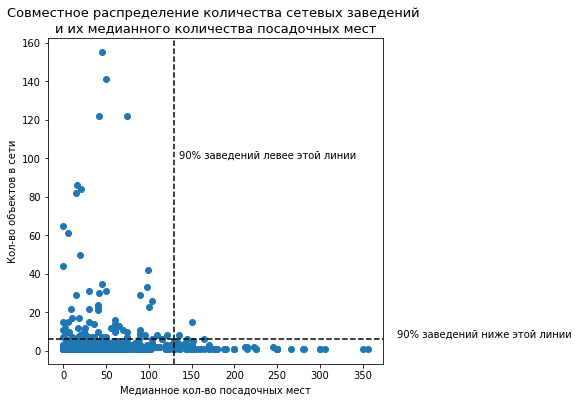

Как мы видим из графика, как правило, в сетевых заведениях - мало заведений с большим количеством посадочных мест.
В 90% сетей не больше 130 посадочных мест и 6 заведений в среднем

Проверим, отличается ли количество посадочных мест в сетевых заведениях от несетевых

Проверим нулевую гипотезу о том, что кол-во посадочных мест в сетевых и несетевых заведениях ОДИНАКОВО
Применим тест Стъюдента, несмотря на то, что наши распределения скорее всего не нормальны.
Благодаря большому количеству значений, нам позволительно использовать здесь тест Стъюдента,
так как распределение всех выборочных средних стремится к нормальному распределению.
Возьмем критический уровень значимости, равный 0.05
P-value: 0.47795311248080785
Нулевая гипотеза НЕ отвергнута. 
Разница между кол-вом посадочных мест в сетевых и несетевых объектах ОТСУТСТВУЕТ


130.0

In [8]:
chain_objects = data[data['chain']==True].groupby('object_name').agg({'object_name':'count', 'number':'median'})
chain_objects.columns = ['objects', 'median_number']
plt.figure(figsize=(6,6))
plt.scatter(chain_objects['median_number'], chain_objects['objects'])
plt.xlabel('Медианное кол-во посадочных мест')
plt.ylabel('Кол-во объектов в сети')
plt.title('Совместное распределение количества сетевых заведений \nи их медианного количества посадочных мест', fontsize=13)
plt.axhline(np.percentile(chain_objects['objects'], 90), linestyle='--', color='black')
plt.axvline(np.percentile(chain_objects['median_number'], 90), linestyle='--', color='black')
plt.text(390,7, '90% заведений ниже этой линии')
plt.text(135,100, '90% заведений левее этой линии')
plt.show()
print('Как мы видим из графика, как правило, в сетевых заведениях - мало заведений с большим количеством посадочных мест.')
print('В 90% сетей не больше {} посадочных мест и {} заведений в среднем'.format(int(np.percentile(chain_objects['median_number'], 90)) , int(np.percentile(chain_objects['objects'], 90))))

print('\nПроверим, отличается ли количество посадочных мест в сетевых заведениях от несетевых')

alpha=0.05

results = stats.ttest_ind(chain_objects['median_number'], data[data['chain']==False]['number'])

print('\nПроверим нулевую гипотезу о том, что кол-во посадочных мест в сетевых и несетевых заведениях ОДИНАКОВО')
print('Применим тест Стъюдента, несмотря на то, что наши распределения скорее всего не нормальны.'
     '\nБлагодаря большому количеству значений, нам позволительно использовать здесь тест Стъюдента,'
     '\nтак как распределение всех выборочных средних стремится к нормальному распределению.')
print('Возьмем критический уровень значимости, равный', alpha)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Нулевая гипотеза отвергнута. \nРазница между кол-вом посадочных мест в сетевых и несетевых объектах СТАТИСТИЧЕСКИ ЗНАЧИМА')
else:
    print('Нулевая гипотеза НЕ отвергнута. \nРазница между кол-вом посадочных мест в сетевых и несетевых объектах ОТСУТСТВУЕТ')
chain_objects
np.percentile(chain_objects['median_number'], 90)

<a id='part_5'></a>
### Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. 
[*Назад к оглавлению*](#content)

Какой вид предоставляет в среднем самое большое количество посадочных мест?

In [9]:
number_of_seats_by_object = data.pivot_table(index='object_type', values='number', aggfunc='median').sort_values(by='number', ascending=False).reset_index()
number_of_seats_by_object.columns=['Тип объекта', 'Кол-во посадочных мест']
print('Топ-5 типов объектов по количеству посадочных мест:\n\n', number_of_seats_by_object.head(5))

fig = px.bar(number_of_seats_by_object, x='Тип объекта', y='Кол-во посадочных мест', 
             text = 'Кол-во посадочных мест', color='Тип объекта', width = 900, height = 550)
for trace in fig.data:
    trace.name = trace.name.split('=')[1]
fig.update_layout(title={'text':'Среднее кол-во посадочных мест по видам объектов',
                        'x':0.125})
fig.show()
print('Как мы видим из графика, именно у типов объекта СТОЛОВАЯ наибольшее количество посадочных мест - в среднем 103!')

Топ-5 типов объектов по количеству посадочных мест:

   Тип объекта  Кол-во посадочных мест
0    столовая                     103
1    ресторан                      80
2         бар                      35
3       буфет                      32
4        кафе                      30


Как мы видим из графика, именно у типов объекта СТОЛОВАЯ наибольшее количество посадочных мест - в среднем 103!


<a id='part_6'></a>
### Выделим в отдельный столбец информацию об улице из столбца address
[*Назад к оглавлению*](#content)

In [10]:
# data['street'] = data['address'].apply(lambda x: x.split(', ')[1])
# data['split_numbers'] = data['address'].apply(lambda x: len(x.split(', ')))
# print(data.split_numbers.value_counts())
data.head(5)
# data[data['split_numbers']==4]

street_types = ['улица', 'бульвар', 'проспект', 'переулок', 'шоссе', 
'проезд', 'набережная', 'площадь', 'аллея', 'линия', 'квартал', 'мост', 'тупик', 'просека']
def street_finder(address):
    for address_part in address.split(', '):
        for street_type in street_types:
            if address_part.lower().find(street_type)!= -1:
                return address_part

data['street'] = data['address'].apply(street_finder)
data_with_streets = data[~(data['street'].isnull())]

print('После выделения улиц из адреса, у нас осталось 382 адреса, в которых не указана улица ЯВНО.\n'
     'Как правило, это поселки и другие загородные адреса. Мы далее не будем использовать такие строки в данных.\n'
     'Мы сохранили датафрейм только с ЯВНЫМИ названиями улиц для дальнейшей работы с улицами. Ниже он.')
data_with_streets.head(5)

После выделения улиц из адреса, у нас осталось 382 адреса, в которых не указана улица ЯВНО.
Как правило, это поселки и другие загородные адреса. Мы далее не будем использовать такие строки в данных.
Мы сохранили датафрейм только с ЯВНЫМИ названиями улиц для дальнейшей работы с улицами. Ниже он.


,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


<a id='part_7'></a>
### Построим график топ-10 улиц по количеству объектов общественного питания. 
[*Назад к оглавлению*](#content)

Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?

In [13]:
top_streets = data_with_streets.groupby('street', as_index=False).agg({'object_name':'count'})
top_streets.columns = ['street', 'objects']
top_streets = top_streets.sort_values(by='objects', ascending = False)
top10_streets = top_streets.head(10)
print('Топ-10 улиц с наибольшим количеством заведений:\n', top10_streets)

fig = px.bar(top10_streets, x='street', y='objects', 
             color='street', width = 900, height = 550, text='objects')
fig.update_xaxes(tickangle=45)
fig.update_layout(
    title='Топ-10 улиц с наибольшим количеством заведений',
    xaxis_title="Улица",
    yaxis_title="Количество заведений")
for trace in fig.data:
    trace.name = trace.name.split('=')[1]
fig.show()

district = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/mosgaz-streets.csv')
district
top10_streets_merged = top10_streets.merge(district[['streetname', 'okrug', 'area']], left_on='street', right_on='streetname')
streets = pd.DataFrame(data=top10_streets_merged['street'].unique(), columns=['street'])

def areas(row, data):
    result = data[data['street']==row['street']]['area'].to_list()
    return result
top10_streets['areas'] = top10_streets.apply(areas, args=[top10_streets_merged], axis=1)
print('\n')
for street, areas in zip(top10_streets['street'], top10_streets['areas']):
    print('{} находится в:'.format(street))   
    for area in areas:
        numeric=1
        print('-', area)
    print('')    

Топ-10 улиц с наибольшим количеством заведений:
                       street  objects
1426           проспект Мира      204
1014       Профсоюзная улица      183
686   Ленинградский проспект      173
997   Пресненская набережная      167
399         Варшавское шоссе      165
689       Ленинский проспект      148
1422    проспект Вернадского      132
676     Кутузовский проспект      114
599          Каширское шоссе      112
606     Кировоградская улица      110




проспект Мира находится в:
- Алексеевский район
- Ярославский Район
- Район Марьина роща
- Останкинский район
- Район Ростокино
- Район Свиблово
- Мещанский район

Профсоюзная улица находится в:
- Академический район
- Район Черемушки
- Район Ясенево
- Район Коньково
- Обручевский район
- Район Теплый Стан

Ленинградский проспект находится в:
- Район Аэропорт
- Район Беговой
- Хорошевский район
- Район Сокол

Пресненская набережная находится в:
- Пресненский район

Варшавское шоссе находится в:
- Район Чертаново Центральное
- Район Чертаново Северное
- Район Чертаново Южное
- Донской район
- Район Нагатино-Садовники
- Нагорный район
- Район Северное Бутово
- Район Южное Бутово

Ленинский проспект находится в:
- Район Проспект Вернадского
- Район Тропарево-Никулино
- Донской район
- Район Гагаринский
- Ломоносовский район
- Обручевский район
- Район Теплый Стан
- Район Якиманка

проспект Вернадского находится в:
- Район Проспект Вернадского
- Район Раменки
- Район Тропарево-Никулино
-

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
areas_top10_streets_pivot = top10_streets_merged.groupby('street', as_index=False).agg({'objects':'mean', 'okrug':'nunique', 'area':'nunique'})
areas_top10_streets_pivot.columns = ['', 'Объектов', 'Округов', 'Районов']
areas_top10_streets_pivot = areas_top10_streets_pivot.set_index('')
areas_top10_streets_pivot.loc[''] = ''
areas_top10_streets_pivot.loc['В среднем'] = areas_top10_streets_pivot[:-1].mean()
areas_top10_streets_pivot


,Объектов,Округов,Районов
,,,
Варшавское шоссе,165,2,8
Каширское шоссе,112,1,4
Кировоградская улица,110,1,3
Кутузовский проспект,114,1,2
Ленинградский проспект,173,1,4
Ленинский проспект,148,4,8
Пресненская набережная,167,1,1
Профсоюзная улица,183,1,6
проспект Вернадского,132,2,5


<a id='part_8'></a>
### Найдем число улиц с одним объектом общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы.
[*Назад к оглавлению*](#content)

In [15]:
streets_with_1_object = top_streets[top_streets['objects']==1]
print('Всего улиц с 1 объектом общественного питания: {}, что составляет {:.1%} от всего кол-ва улиц с объектами общественного питания'\
      .format(len(streets_with_1_object), (len(streets_with_1_object)/len(top_streets))))

streets_with_1_object_merged = streets_with_1_object.merge(district[['streetname', 'okrug', 'area']], left_on='street', right_on='streetname')
# streets = pd.DataFrame(data=top10_streets_merged['street'].unique(), columns=['street'])

def areas(row, data):
    result = data[data['street']==row['street']]['area'].to_list()
    return result
streets_with_1_object['areas'] = streets_with_1_object.apply(areas, args=[streets_with_1_object_merged], axis=1)
print('\n')

print('Районы, в которых находятся улицы с 1 объектом общественного питания:')
for area in streets_with_1_object_merged['area'].sort_values().unique():
    print('-', area)

Всего улиц с 1 объектом общественного питания: 551, что составляет 28.9% от всего кол-ва улиц с объектами общественного питания


Районы, в которых находятся улицы с 1 объектом общественного питания:
- Алексеевский район
- Алтуфьевский район
- Бабушкинский район
- Басманный район
- Бескудниковский Район
- Бутырский район
- Войковский Район
- Головинский район
- Даниловский район
- Дмитровский район
- Донской район
- Красносельский район
- Лосиноостровский район
- Мещанский район
- Можайский Район
- Молжаниновский район
- Нагорный район
- Нижегородский район
- Обручевский район
- Останкинский район
- Панфиловский район
- Пресненский район
- Район Арбат
- Район Аэропорт
- Район Беговой
- Район Бирюлево Восточное
- Район Богородское
- Район Внуково
- Район Восточное Измайлово
- Район Восточный
- Район Выхино-Жулебино
- Район Гагаринский
- Район Гольяново
- Район Дорогомилово
- Район Замоскворечье
- Район Западное Дегунино
- Район Зюзино
- Район Ивановское
- Район Измайлово
- Район Коньков

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<a id='part_9'></a>
### Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Подумаем, какие закономерности можно выявить.
[*Назад к оглавлению*](#content)

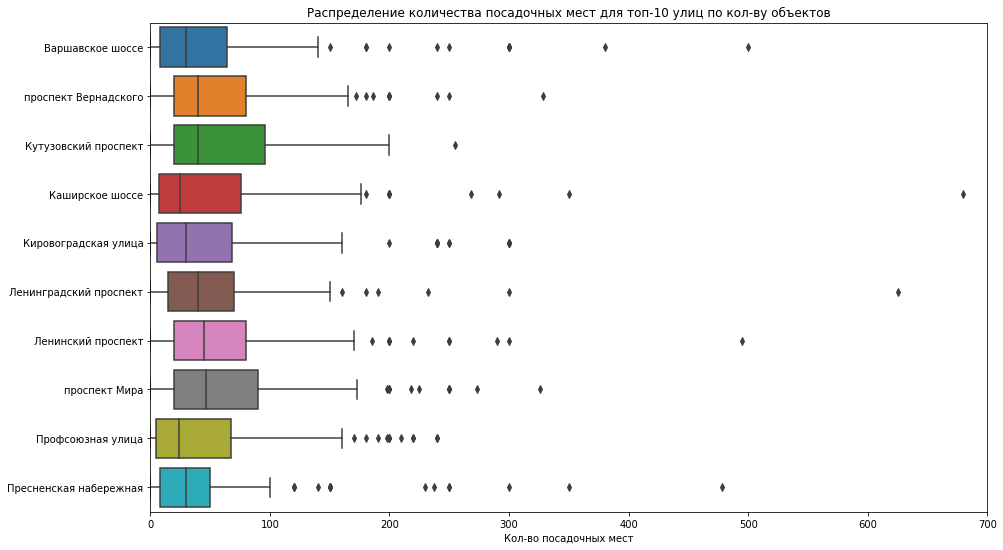

Среднее кол-во посадочных мест в заведениях на топ-10 улицах по количеству объектов: 38.5
Среднее кол-во посадочных мест в заведениях НЕ на топ-10 улицах по количеству объектов: 40.0

Проверим, значима ли статистически разница между кол-вами посадочных мест
в заведениях на топ-10 улицах и остальных.
Используем тест Стъюдента.
Нулевой гипотезой будет гипотеза о равенстве количества посадочных мест на топ-10 улицах по
количеству объектов и на остальных улицах.
P-value: 0.3868435747276817
Не отвергаем нулевую гипотезу. Разницы между количествами посадочных мест НЕТ.


In [16]:
top10_streets_list = top10_streets['street'].to_list()
top10_streets_data = data.query('street in @top10_streets_list')


top10_streets_data['number'].median()
data['number'].median()
plt.figure(figsize=(15,9))
plt.xlim(0,700)
sns.boxplot(data=top10_streets_data, x='number', y='street')
plt.title('Распределение количества посадочных мест для топ-10 улиц по кол-ву объектов')
plt.ylabel('')
plt.xlabel('Кол-во посадочных мест')
plt.show()

print('Среднее кол-во посадочных мест в заведениях на топ-10 улицах по количеству объектов: {}'.format(top10_streets_data['number'].median()))
print('Среднее кол-во посадочных мест в заведениях НЕ на топ-10 улицах по количеству объектов: {}'\
.format(data.query('street not in @top10_streets_list')['number'].median()))

print('\nПроверим, значима ли статистически разница между кол-вами посадочных мест'
'\nв заведениях на топ-10 улицах и остальных.')
print('Используем тест Стъюдента.')
print('Нулевой гипотезой будет гипотеза о равенстве количества посадочных мест на топ-10 улицах по'
'\nколичеству объектов и на остальных улицах.')
alpha=0.05

results = stats.ttest_ind(data.query('street not in @top10_streets_list')['number'],
                            top10_streets_data['number'])
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, разница между количествами посадочных мест статистически ЗНАЧИМА.')
else:
    print('Не отвергаем нулевую гипотезу. Разницы между количествами посадочных мест НЕТ.')

<a id='part_10'></a>
## Сделаем общий вывод
[*Назад к оглавлению*](#content)

Дадим рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируем возможность развития сети.


Мы выяснили, что наибольшее количество типов объектов общественного притания составляют кафе 40%, столовые 17%, рестораны 15%, фастфуды 12,5% и бары 6%. 

При этом сетевых заведений лишь 20% от общего количества, остальные - несетевые.  
Сетевое распространение характерно для предприятий быстрого обслуживания (41% заведений данного типа).
В меньше мере оно характерно для магазинов (29% заведений), ресторанов (24% заведений) и кафе (23% заведений).
Как правило для сетевых заведений характерно - мало заведений с большим количеством посадочных мест.
В 90% сетей не больше 130 посадочных мест и 6 заведений в среднем.

**Среднее количество посадочных мест по типам объектов общественного питания:**
* столовая 103
* ресторан 80
* бар 35
* буфет 32
* кафе 30

Как мы видим, именно у типов объекта СТОЛОВАЯ наибольшее количество посадочных мест - в среднем 103!

**Топ-10 улиц с наибольшим количеством заведений:**
* проспект Мира 204
* Профсоюзная улица 183
* Ленинградский проспект 173
* Пресненская набережная 167
* Варшавское шоссе 165
* Ленинский проспект 148
* проспект Вернадского 132
* Кутузовский проспект 114
* Каширское шоссе 112
* Кировоградская улица 110

Так же у нас есть список районов, в которых располагаются топ-10 улиц по кол-ву объектов общественного питания.
Всего улиц с одним объектом общественного питания: 551, что составляет 28.9% от всего кол-ва улиц с объектами общественного питания в Москве. Список районов мы так же можем предоставить, в которых располагаются данные улицы.

Среднее кол-во посадочных мест в заведениях на топ-10 улицах по количеству объектов: 38.5
Среднее кол-во посадочных мест в заведениях НЕ на топ-10 улицах по количеству объектов: 40.0

Проверили, значима ли статистически разница между кол-вами посадочных мест в заведениях на топ-10 улицах и остальных.
Нулевой гипотезой считали гипотезу о равенстве количества посадочных мест.
Полученный p-value: 0.3868435747276817
Нулевую гипотезу мы не смогли отвергнуть. Это означает, что разницы между количествами посадочных мест НЕТ.

**Рекомендации:**

Сложно дать какие-то рекомендации без обратной связи и бОльшей информации от инвесторов и учредителей. Можно отталкиваться от того, что на рынке более популярны кафе (предполагаем, что раз их больше, то они более популярны, но не факт), потому именно такой тип заведения и рекомендовать со средним количеством посадочных мест на 30 персон. Касаемо района и улиц, то предполагаем что объект лучше размещать на одной из топ-10 улиц, ведь не спроста на этих улицах наибольшее количество объектов. Но эта логика тоже не совсем точна, так как все-таки самое важное - это проходимость объекта, преобладающая каста людей в радиусе в зависимости от портрета клиента. Плюс непонятно, в какие сроки инвесторы хотят отбить свои первоначальные вложения. Как правило рестораны отбиваются дольше. Так же необходимо понимать, что с выбором места размещения объекта есть множество нюансов, например, если инвесторы всё-таки склонятся к меньшим затратам и более быстрой окупаемости, то возможно выберут тип объекта - столовую с не столь большими вложениями, оформленную необычным способом. В таком случае необходимо будет проводить анализ по расположению бизнес центров, учебных заведений и других крупных объектов с большим количеством людей, готовых заходить в наше потенциальное заведение на бизнес-ланчи.
Плюс, выбирая улицы с наибольшим количеством объектов для потенциального размещения заведения, можно не учесть новые перспективные районы. К примеру, Москва-сити когда-то практически не имела заведений общественного питания, хотя сейчас там находятся топовые кафе и рестораны.

Наше исследование получилось очень поверхностным. Если бы мы использовали api яндекс геокодера, то смогли бы расположить все заведения на карте и общая картина была бы видна лучше. Плюс надо было бы обратить внимание на перспективные районы с малым количеством заведений на текущий момент. Необходимо было бы провести анализ по расположению мест скопления большого количества людей, кто регулярно покупает бизнес-ланчи - ВУЗы, крупные предприятия, бизнес-центры. Желательно учитывать по текущим объектам расстояния до метро, какое метро, средние чеки в заведениях. (посмотреть зависимость среднего чека от типов объекта, расстояния от метро, расположениях в топовых районах). Так же желательно выделить наиболеее интересные здания для размещения заведений - высотки, исторические здания, топовые отели и гостиницы. Плюс желательно подумать об иностранных туристах заранее, ведь можно примерно сказать, где они проводят большую часть времени в Москве.